In [123]:
import pickle
import pandas as pd
import numpy as np

In [124]:
signal_names = ['gauss', 'heavi', 'step', 'blocks', 'bumps', 'linear']
final_df = None
final_df_all = None
for signal_name in signal_names:
    with open(f'../simulation/results/simu_metric_{signal_name}_rerun.pkl', 'rb') as f:
        metrics = pickle.load(f)
        results_df = pd.DataFrame(metrics)
        results_df.loc[results_df['metric'] == 'mean_squared_error', 'metric'] = 'rmse'
        results_df.loc[results_df["metric"]=='rmse','score'] = np.sqrt(results_df[results_df["metric"]=='rmse']['score'])
        results_df.loc[results_df['metric'] == 'mean_absolute_error', 'metric'] = 'mae'
        if final_df_all is None:
            final_df_all = results_df
        else:
            final_df_all = pd.concat([final_df_all, results_df])

In [125]:
signal_names = ['gauss', 'heavi', 'step', 'blocks', 'bumps', 'linear']
final_df_all_gp = None
for signal_name in signal_names:
    with open(f'../simulation/results/simu_metric_{signal_name}.pkl', 'rb') as f:
        metrics = pickle.load(f)
        results_df = pd.DataFrame(metrics)
        results_df.loc[results_df['metric'] == 'mean_squared_error', 'metric'] = 'rmse'
        results_df.loc[results_df["metric"]=='rmse','score'] = np.sqrt(results_df[results_df["metric"]=='rmse']['score'])
        results_df.loc[results_df['metric'] == 'mean_absolute_error', 'metric'] = 'mae'
        if final_df_all_gp is None:
            final_df_all_gp = results_df
        else:
            final_df_all_gp = pd.concat([final_df_all_gp, results_df])

In [126]:
final_df_all = final_df_all[final_df_all['model'] != 'GP_RBF']
final_df_all = pd.concat([final_df_all, final_df_all_gp])

In [127]:
signal_names = ['gauss', 'heavi', 'step', 'blocks', 'bumps', 'linear']
final_df_all_btf = None
for signal_name in signal_names:
    with open(f'../simulation/results/simu_metric_{signal_name}_btf_init.pkl', 'rb') as f:
        metrics = pickle.load(f)
        results_df = pd.DataFrame(metrics)
        results_df.loc[results_df['metric'] == 'mean_squared_error', 'metric'] = 'rmse'
        results_df.loc[results_df["metric"]=='rmse','score'] = np.sqrt(results_df[results_df["metric"]=='rmse']['score'])
        results_df.loc[results_df['metric'] == 'mean_absolute_error', 'metric'] = 'mae'
        if final_df_all_btf is None:
            final_df_all_btf = results_df
        else:
            final_df_all_btf = pd.concat([final_df_all_btf, results_df])

In [128]:
final_df_all_btf = final_df_all_btf[final_df_all_btf['model'] == 'btf1_NIG']
final_df_all = final_df_all[final_df_all['model'] != 'btf0']
final_df_all = pd.concat([final_df_all, final_df_all_btf])

In [129]:
signal_names = ['gauss', 'heavi', 'step', 'blocks', 'bumps', 'linear']
final_df_all_btf = None
for signal_name in signal_names:
    with open(f'../simulation/results/simu_metric_{signal_name}_btf_dhs.pkl', 'rb') as f:
        metrics = pickle.load(f)
        results_df = pd.DataFrame(metrics)
        results_df.loc[results_df['metric'] == 'mean_squared_error', 'metric'] = 'rmse'
        results_df.loc[results_df["metric"]=='rmse','score'] = np.sqrt(results_df[results_df["metric"]=='rmse']['score'])
        results_df.loc[results_df['metric'] == 'mean_absolute_error', 'metric'] = 'mae'
        if final_df_all_btf is None:
            final_df_all_btf = results_df
        else:
            final_df_all_btf = pd.concat([final_df_all_btf, results_df])

In [130]:
final_df_all = pd.concat([final_df_all, final_df_all_btf])

In [131]:
final_df_all['model'] = final_df_all['model'].replace({'VEBTF-ash_update': 'EBTF', 
                                                 'genlasso_tf0': 'genlasso-tf', 
                                                 'haar_BayesShrink': 'wave-Bayes', 
                                                 'haar_VisuShrink': 'wave-hard', 
                                                 'susie_tf10': 'susie-tf-10', 
                                                 'susie_tf20': 'susie-tf-20',
                                                 'susie_tf30': 'susie-tf-30',
                                                 'GP_Matern32':"GP",
                                                 'btf1_DHS': 'BTF-DHS',
                                                 'btf1_NIG': 'BTF-NIG'})
final_df_all['signal_name'] = final_df_all['signal_name'].replace({'gauss': 'Gauss', 'heavi': 'HeaviSine', 'step': 'Step', 'blocks': 'Blocks', 'bumps': 'Bumps', 'linear': 'Linear'})

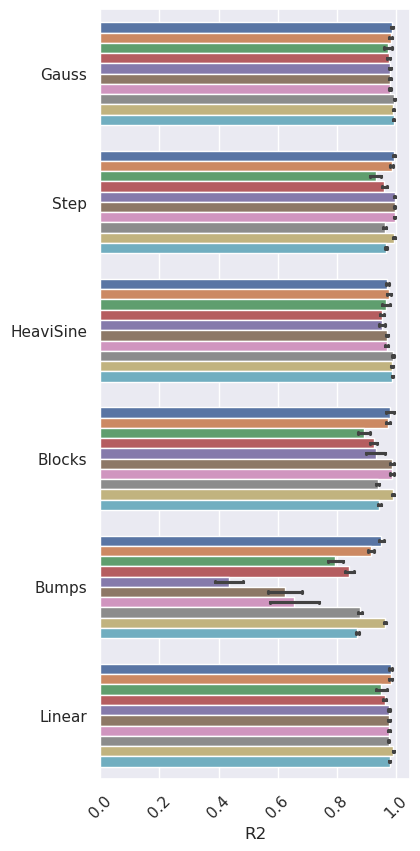

In [138]:
sns.set(style="darkgrid")

model_order = ['EBTF', 'genlasso-tf', 'wave-Bayes', 'wave-hard', 'susie-tf-10', 'susie-tf-20', 'susie-tf-30', 'GP', 'BTF-DHS', 'BTF-NIG' ]
signal_order = ['Gauss',  'Step', 'HeaviSine','Blocks', 'Bumps', 'Linear']
plt.figure(figsize=(4, 10))
sns.barplot(
    x='score',
    y='signal_name',  # use the original score column
    hue='model',
    data=final_df_all[final_df_all['metric'] == "r2_score"],
    errorbar='sd',  # 95% confidence interval
    capsize=0.1,
    order=signal_order,
    hue_order=model_order,
    orient='h'
)
plt.xlabel('R2')
plt.ylabel('')
# plt.title('Bar Chart of Score for Each Model and Signal Name')
plt.xticks(rotation=45)
# put lenend outside
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend().remove()
plt.savefig('simu_metric_r2.pdf', bbox_inches='tight')
plt.show()

In [103]:
# sns.set(style="darkgrid")

# model_order = ['EBTF-wavelet', 'EBTF-cvtf']
# signal_order = ['Gauss',  'Step', 'HeaviSine','Blocks', 'Bumps', 'Linear']
# plt.figure(figsize=(4, 8))
# sns.barplot(
#     x='score',
#     y='signal_name',  # use the original score column
#     hue='model',
#     data=final_df_all[final_df_all['metric'] == "rmse"],
#     errorbar='sd',  # 95% confidence interval
#     capsize=0.1,
#     order=signal_order,
#     hue_order=model_order,
#     orient='h'
# )
# plt.xlabel('RMSE')
# plt.ylabel('')
# # plt.title('Bar Chart of Score for Each Model and Signal Name')
# plt.xticks(rotation=45)
# # put lenend outside
# # plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.legend()
# plt.savefig('simu_metric_rmse_ebtf_init.pdf', bbox_inches='tight')
# plt.show()

In [104]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# sns.set(style="darkgrid")

# model_order = ['EBTF', 'genlasso-tf', 'Wave-Bayes', 'Wave-hard', 'susie-tf-10', 'susie-tf-20', 'susie-tf-30', 'GP', 'BTF' ]
# plt.figure(figsize=(4, 8))
# sns.barplot(
#     x='score',
#     y='model',  # use the original score column
#     hue='signal_name',
#     data=final_df_all[final_df_all['metric'] == "r2_score"],
#     errorbar='sd',  # 95% confidence interval
#     capsize=0.1,
#     order=model_order,
#     orient='h'
# )
# plt.xlabel('R2')
# plt.ylabel('')
# # plt.title('Bar Chart of Score for Each Model and Signal Name')
# plt.xticks(rotation=45)
# plt.legend().remove()
# # plt.savefig('simu_metric_r2.pdf', bbox_inches='tight')
# plt.show()


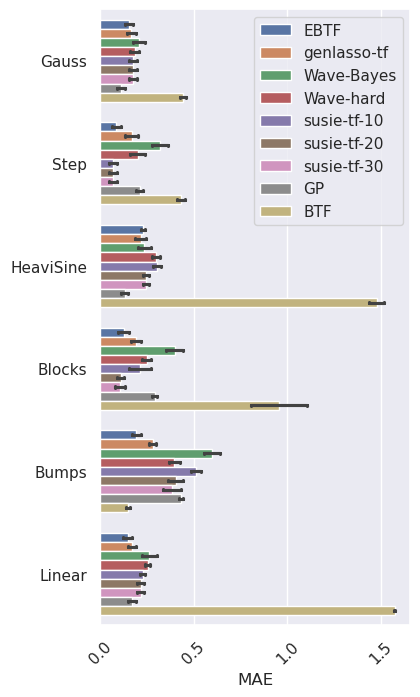

In [26]:
sns.set(style="darkgrid")

model_order = ['EBTF', 'genlasso-tf', 'Wave-Bayes', 'Wave-hard', 'susie-tf-10', 'susie-tf-20', 'susie-tf-30', 'GP', 'BTF' ]
signal_order = ['Gauss',  'Step', 'HeaviSine','Blocks', 'Bumps', 'Linear']
plt.figure(figsize=(4, 8))
sns.barplot(
    x='score',
    y='signal_name',  # use the original score column
    hue='model',
    data=final_df_all[final_df_all['metric'] == "mae"],
    errorbar='sd',  # 95% confidence interval
    capsize=0.1,
    order=signal_order,
    hue_order=model_order,
    orient='h'
)
plt.xlabel('MAE')
plt.ylabel('')
# plt.title('Bar Chart of Score for Each Model and Signal Name')
plt.xticks(rotation=45)
# put lenend outside
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend()
plt.savefig('simu_metric_mae.pdf', bbox_inches='tight')
plt.show()

## plot run_time vs rmse

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
metric = 'r2_score'
final_df = final_df_all[final_df_all['metric'] == metric]
final_df = final_df.drop(['metric','signal_name'], axis=1)

In [151]:
final_res = final_df.groupby(['model']).mean().reset_index()

In [105]:
# final_res['model'] = final_res['model'].replace({'VEBTF-ash_update': 'EBTF', 
#                                                  'genlasso_tf0': 'genlasso-tf', 
#                                                  'haar_BayesShrink': 'Wave-Bayes', 
#                                                  'haar_VisuShrink': 'Wave-hard', 
#                                                  'susie_tf10': 'susie-tf-10', 
#                                                  'susie_tf20': 'susie-tf-20',
#                                                  'susie_tf30': 'susie-tf-30',
#                                                  'GP_RBF':"GP",
#                                                  'btf0': 'BTF'})


In [152]:
final_res

,model,n,snr,rep,seed,score,run_time
0,BTF-DHS,1024.0,3.0,9.5,9.5,0.985358,84.167881
1,BTF-NIG,1024.0,3.0,9.5,9.5,0.956020,10.192793
2,EBTF,1024.0,3.0,9.5,9.5,0.977022,0.636541
3,GP,1024.0,3.0,9.5,9.5,0.956037,3.724237
4,genlasso-tf,1024.0,3.0,9.5,9.5,0.968658,6.815204
5,susie-tf-10,1024.0,3.0,9.5,9.5,0.878086,4.473307
6,susie-tf-20,1024.0,3.0,9.5,9.5,0.921522,10.876018
7,susie-tf-30,1024.0,3.0,9.5,9.5,0.926924,18.421133
8,wave-Bayes,1024.0,3.0,9.5,9.5,0.917646,0.001068
9,wave-hard,1024.0,3.0,9.5,9.5,0.935806,0.001576


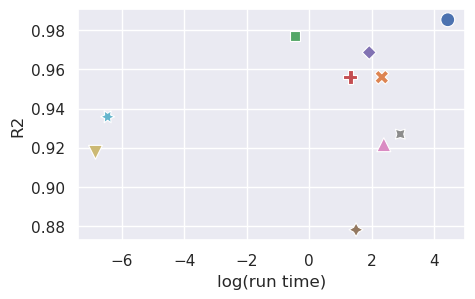

In [154]:
sns.set(style="darkgrid")
plt.figure(figsize=(5, 3))
sns.scatterplot(data=final_res, x=np.log(final_res['run_time']), 
                y=final_res['score'], hue=final_res['model'], 
                style=final_res['model'],
                markers=True, s=100)
plt.ylabel('R2')
plt.xlabel('log(run time)')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3).remove()
plt.savefig('simu_metric_runtime_r2.pdf', bbox_inches='tight')
plt.show()


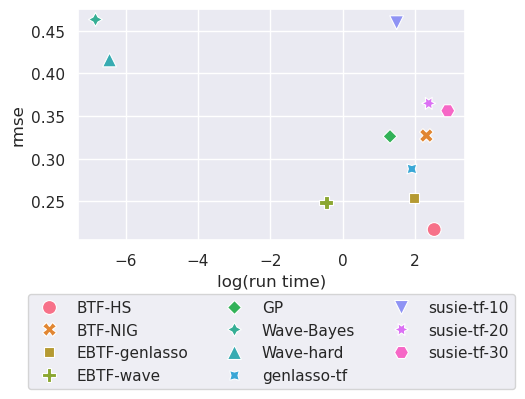

In [70]:
sns.set(style="darkgrid")
plt.figure(figsize=(5, 3))
sns.scatterplot(data=final_res, x=np.log(final_res['run_time']), 
                y=final_res['score'], hue=final_res['model'], 
                style=final_res['model'],
                markers=True, s=100)
plt.ylabel('rmse')
plt.xlabel('log(run time)')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
# plt.savefig('simu_metric_runtime_rmse.pdf', bbox_inches='tight')
plt.show()
